# Global Power Plant Database

  country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN              

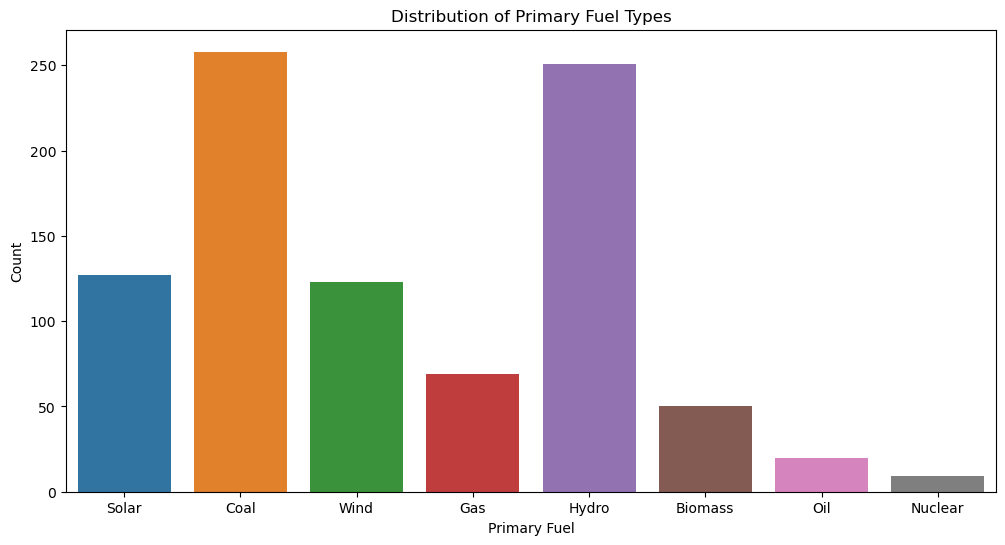

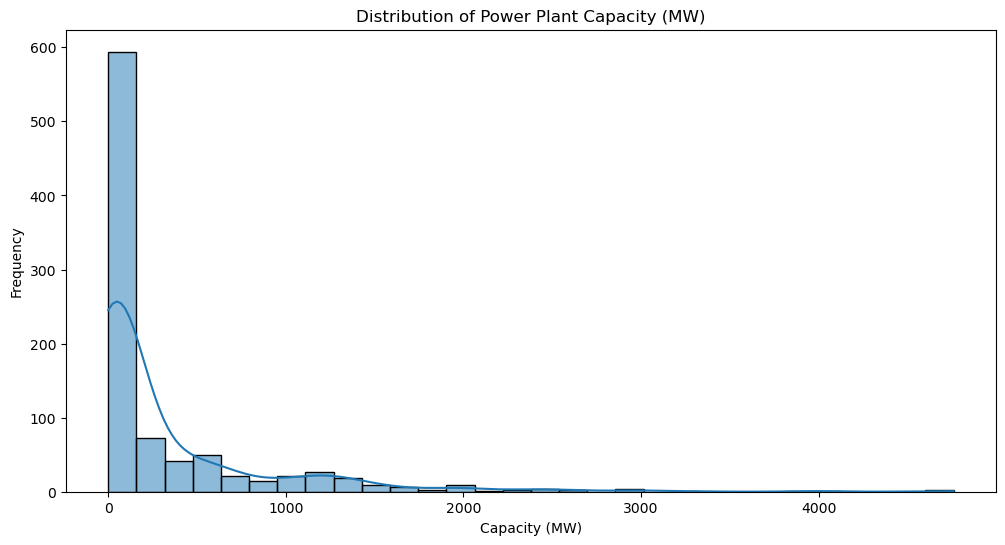

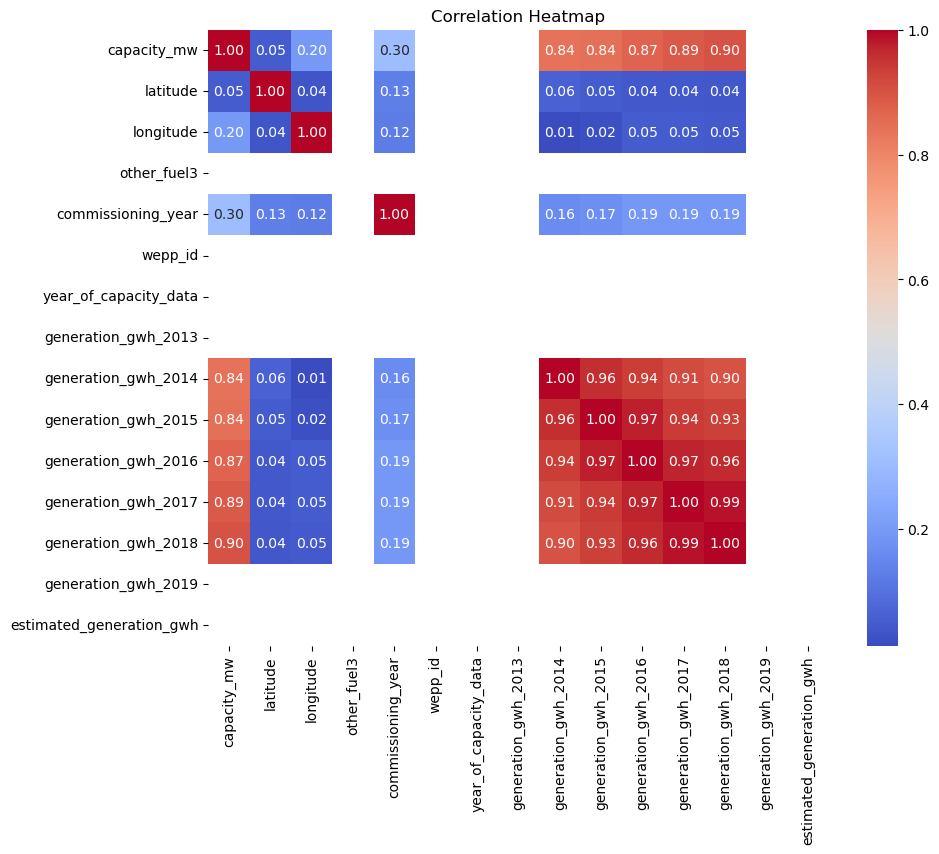

Predicted Primary Fuel: Coal
Predicted Capacity (MW): 326.2237552370453


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv"
power_plant_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(power_plant_data.head())

# Basic information about the dataset
print(power_plant_data.info())

# Summary statistics for numerical columns
print(power_plant_data.describe())

# Check for missing values
print(power_plant_data.isnull().sum())

# Visualize distribution of primary fuel types
plt.figure(figsize=(12, 6))
sns.countplot(x='primary_fuel', data=power_plant_data)
plt.title('Distribution of Primary Fuel Types')
plt.xlabel('Primary Fuel')
plt.ylabel('Count')
plt.show()

# Visualize distribution of capacity_mw
plt.figure(figsize=(12, 6))
sns.histplot(power_plant_data['capacity_mw'], bins=30, kde=True)
plt.title('Distribution of Power Plant Capacity (MW)')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numerical variables
correlation_matrix = power_plant_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Prediction 1: Primary Fuel
# Let's use a simple value count to predict the primary fuel
predicted_primary_fuel = power_plant_data['primary_fuel'].value_counts().idxmax()
print(f"Predicted Primary Fuel: {predicted_primary_fuel}")

# Prediction 2: Capacity (MW)
# Let's use the mean capacity as a prediction
predicted_capacity = power_plant_data['capacity_mw'].mean()
print(f"Predicted Capacity (MW): {predicted_capacity}")

# Temperature Forecast Project using ML

In [3]:
!pip install xgboost

     --------------------------------------- 99.8/99.8 MB 13.4 MB/s eta 0:00:00


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [9]:
# Load the dataset
url = "https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv"
temperature_data = pd.read_csv(url)

In [10]:
# Display the first few rows of the dataset
print(temperature_data.head())

   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

In [11]:
# Split the data into features (X) and target variables (y)
X = temperature_data.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_max = temperature_data['Next_Tmax']
y_min = temperature_data['Next_Tmin']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_max_train, y_max_test, y_min_train, y_min_test = train_test_split(
    X, y_max, y_min, test_size=0.2, random_state=42
)

In [15]:
# Convert the 'Date' column to datetime format
X_train['Date'] = pd.to_datetime(X_train['Date'])
X_test['Date'] = pd.to_datetime(X_test['Date'])

# Extract relevant features from the date
X_train['Year'] = X_train['Date'].dt.year
X_train['Month'] = X_train['Date'].dt.month
X_train['Day'] = X_train['Date'].dt.day

X_test['Year'] = X_test['Date'].dt.year
X_test['Month'] = X_test['Date'].dt.month
X_test['Day'] = X_test['Date'].dt.day

# Drop the original 'Date' column
X_train = X_train.drop('Date', axis=1)
X_test = X_test.drop('Date', axis=1)


C:\Users\tamim\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-08-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\tamim\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-08-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\tamim\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\tamim\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-08-2017' in DD/MM/YYYY format. Provide format or specif

In [17]:
# Model for predicting next-day minimum temperature
# Check for NaN or infinite values in y_min_train
print("NaN values in y_min_train:", y_min_train.isnull().sum())
print("Infinite values in y_min_train:", not np.isfinite(y_min_train).all())

# Replace NaN or infinite values with a suitable strategy
y_min_train.fillna(y_min_train.mean(), inplace=True)

# Alternatively, you can drop rows with NaN or infinite values
# y_min_train.dropna(inplace=True)

# Model for predicting next-day minimum temperature
min_temp_model = xgb.XGBRegressor()
min_temp_model.fit(X_train, y_min_train, eval_metric="rmse")
min_temp_predictions = min_temp_model.predict(X_test)

NaN values in y_min_train: 23
Infinite values in y_min_train: True


C:\Users\tamim\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


In [24]:
# Handle missing values
X_train.fillna(X_train.mean(), inplace=True)  # Replace NaN with the mean (or choose another imputation strategy)
y_max_train.fillna(y_max_train.mean(), inplace=True)
y_min_train.fillna(y_min_train.mean(), inplace=True)

# Handle infinite values
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)

# Train the models
max_temp_model.fit(X_train, y_max_train)
min_temp_model.fit(X_train, y_min_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [26]:
from sklearn.model_selection import cross_val_score

In [31]:
# There are 25 stations, dividing data into respective stations
station = {i: temperature_data.loc[temperature_data['station'] == i].copy() for i in range(1, 26)}

# All the columns are float64, and since the std. deviation is less and the total no. of
# missing values are less, filling all the nan values with the respective column avg.
for i in range(1, 26):
    station[i].fillna(station[i].mean(), inplace=True)

C:\Users\tamim\AppData\Local\Temp\ipykernel_8944\540157411.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  station[i].fillna(station[i].mean(), inplace=True)


In [34]:
# Check the column names in the DataFrame for station 1
print(station[1].columns)

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


In [36]:
# Assuming 'Date' is not in datetime format, convert it to datetime
station[1]['Date'] = pd.to_datetime(station[1]['Date'])

# Let's predict the Next_Tmax and Next_Tmin for 2017 at station-1
train = station[1].loc[station[1]['Date'].dt.year != 2017]
valid = station[1].loc[station[1]['Date'].dt.year == 2017]


C:\Users\tamim\AppData\Local\Temp\ipykernel_8944\189829152.py:2: UserWarning: Parsing '30-06-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  station[1]['Date'] = pd.to_datetime(station[1]['Date'])
C:\Users\tamim\AppData\Local\Temp\ipykernel_8944\189829152.py:2: UserWarning: Parsing '13-07-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  station[1]['Date'] = pd.to_datetime(station[1]['Date'])
C:\Users\tamim\AppData\Local\Temp\ipykernel_8944\189829152.py:2: UserWarning: Parsing '14-07-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  station[1]['Date'] = pd.to_datetime(station[1]['Date'])
C:\Users\tamim\AppData\Local\Temp\ipykernel_8944\189829152.py:2: UserWarning: Parsing '15-07-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  station[1]['Date'] = pd.to_datet

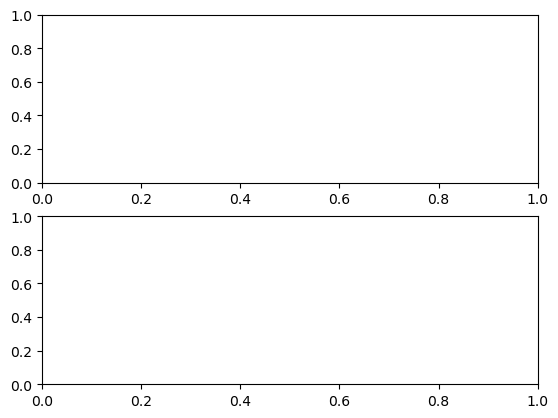

In [37]:
#plotting the results
nrows = 2
ncols = 1
fig, (ax1,ax2) = plt.subplots(nrows=nrows, ncols=ncols)

In [ ]:
#This Multiple Linear Regression model has an accuracy of 80% for predicting Next_Tmax and
#86% accuracy for predicting Next_Tmin at station-1
#This model can be applied at other stations also and the accuracies can be observed

# Loan Application Status Prediction

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
url = "https://github.com/dsrscientist/DSData/raw/master/loan_prediction.csv"
loan_data = pd.read_csv(url)

In [49]:
# Handling NaN values
loan_data.fillna(loan_data.mean(), inplace=True)

# Handling infinite values
loan_data.replace([np.inf, -np.inf], np.nan, inplace=True)
loan_data.dropna(inplace=True)

C:\Users\tamim\AppData\Local\Temp\ipykernel_8944\1518618712.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  loan_data.fillna(loan_data.mean(), inplace=True)


In [50]:
# Explore the dataset
print(loan_data.head())

# Data preprocessing
# Handle missing values
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)

# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
categorical_cols = loan_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    loan_data[col] = le.fit_transform(loan_data[col])

# Check for infinite or too large values
if not loan_data.select_dtypes(['float64', 'float32']).applymap(np.isfinite).all().all():
    raise ValueError("Dataset contains infinite or too large values.")

# Split the data into features and target variable
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model (Random Forest Classifier as an example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display other evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   